In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import numpy as np

# Realiza o cálculo que determina a situação do motorista. Sendo elas, atrasado, adiantado ou sem atraso

In [11]:
def df_hours(hora_prevista, hora_entreposto):
    
    dif = hora_prevista - hora_entreposto
    dif_in_s = dif.total_seconds()
    dias = divmod(dif_in_s,86400)
    horas = divmod(dias[1],3600)
    minutos = divmod(horas[1],60)
    segundos = divmod(minutos[1],1)
    
    if dias[0] >= 1 or (horas[0] >= 1 and minutos[0] >= 1):
         return 'ATRASADO'
    elif dias[0] <= -1 or (horas[0] >= 1 and minutos[0] >= 1):
        return 'ADIANTADO'
    else:
        return 'PONTUAL'

# Filtros de produtos que os camionhoneiro transporta e de sua situação

In [12]:
def __filter(produto):
    
    soja = list(filter(lambda x: x == 'Soja', produto))
    milho= list(filter(lambda x: x == 'Milho', produto))
    
    return soja, milho
    
def __filter_situations(situations):
    atrasado = list(filter(lambda x:x == 'ATRASADO', situations))
    adiantado = list(filter(lambda x:x == 'ADIANTADO', situations))
    pontual = list(filter(lambda x:x == 'PONTUAL', situations))
    
    return atrasado, adiantado, pontual

# Cria um Dataframe separando os produtos por mês

In [13]:
def product_per_month(agendamento,produto):
    timezone = pytz.timezone('America/Sao_Paulo')
    lenght = len(agendamento)
    agendamento_set = set()
    dic = {}
    produtos = list()
    k = 0
    
    mes_01 = list()
    mes_02 = list()
    mes_03 = list()
    mes_04 = list()
    mes_05 = list()
    mes_06 = list()
    mes_07 = list()
    mes_08 = list()
    mes_09 = list()
    mes_10 = list()
    mes_11 = list()
    mes_12 = list()
    
    for i in range(len(agendamento)):
        if pd.isna(agendamento[i]):
            continue
        else:
            time_agendamento = datetime.strptime(agendamento[i], '%d/%m/%Y %H:%M:%S')
            timezone_date_agendamento = timezone.localize(time_agendamento)
            agendamento_set.add(int(str(timezone_date_agendamento.month)))
            
            if timezone_date_agendamento.month == 1:
                mes_01.append(produto[i])
            elif timezone_date_agendamento.month == 2:
                mes_02.append(produto[i])
            elif timezone_date_agendamento.month == 3:
                mes_03.append(produto[i])
            elif timezone_date_agendamento.month == 4:
                mes_04.append(produto[i])
            elif timezone_date_agendamento.month == 5:
                mes_05.append(produto[i])
            elif timezone_date_agendamento.month == 6:
                mes_06.append(produto[i])
            elif timezone_date_agendamento.month == 7:
                mes_07.append(produto[i])
            elif timezone_date_agendamento.month == 8:
                mes_08.append(produto[i])
            elif timezone_date_agendamento.month == 9:
                mes_09.append(produto[i])
            elif timezone_date_agendamento.month == 10:
                mes_10.append(produto[i])
            elif timezone_date_agendamento.month == 11:
                mes_11.append(produto[i])
            elif timezone_date_agendamento.month == 12:
                mes_12.append(produto[i])

    dic = dict.fromkeys(agendamento_set, [])
    df = pd.DataFrame(list(zip(mes_01,mes_02,mes_03,mes_04,mes_05,
            mes_06,mes_07,mes_08,mes_09,mes_10,
            mes_11,mes_12)),columns=list(agendamento_set))
  
    return df  

# Cria um Dataframe separando as situações dos caminhoneiros em cada mês

In [14]:
def arrival_per_month(agendamento, chegada_prevista, chegada_entreposto):
    timezone = pytz.timezone('America/Sao_Paulo')
    agendamento_set = set()
    
    mes_01 = list()
    mes_02 = list()
    mes_03 = list()
    mes_04 = list()
    mes_05 = list()
    mes_06 = list()
    mes_07 = list()
    mes_08 = list()
    mes_09 = list()
    mes_10 = list()
    mes_11 = list()
    mes_12 = list()
    
    for i in range(len(agendamento)):
        if pd.isna(agendamento[i]) and pd.isna(chegada_prevista) and pd.isna(chegada_entreposto):
            continue
        else:
            time_agendamento = datetime.strptime(agendamento[i], '%d/%m/%Y %H:%M:%S')
            timezone_date_agendamento = timezone.localize(time_agendamento)
            agendamento_set.add(int(str(timezone_date_agendamento.month)))
            
            time_prevista = datetime.strptime(chegada_prevista[i], '%d/%m/%Y %H:%M:%S')
            timezone_date_obj_prevista = timezone.localize(time_prevista)
            
            time_entreposto = datetime.strptime(chegada_entreposto[i],'%d/%m/%Y %H:%M:%S')
            timezone_date_obj_entreposto = timezone.localize(time_entreposto)
            

            if timezone_date_agendamento.month == 1:
                mes_01.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 2:
                mes_02.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 3:
                mes_03.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 4:
                mes_04.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 5:
                mes_05.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 6:
                mes_06.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 7:
                mes_07.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 8:
                mes_08.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 9:
                mes_09.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 10:
                mes_10.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 11:
                mes_11.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
            elif timezone_date_agendamento.month == 12:
                mes_12.append(df_hours(timezone_date_obj_entreposto, timezone_date_obj_prevista))
                
                
    dic = dict.fromkeys(agendamento_set, [])
    df = pd.DataFrame(list(zip(mes_01,mes_02,mes_03,mes_04,mes_05,
            mes_06,mes_07,mes_08,mes_09,mes_10,
            mes_11,mes_12)),columns=list(agendamento_set))
    
    return df 

# Leitura do arquivo csv

In [15]:
#MAIN
df = pd.read_csv('data/final-dataset.csv',engine='python')

chegada_prevista, chegada_entreposto =  df['Chegada Prevista'], df['Chegada ao Entreposto']
produto = df['Produto']
agendamento = df['Agendamento']

# Gráfico de pizza dos produtos

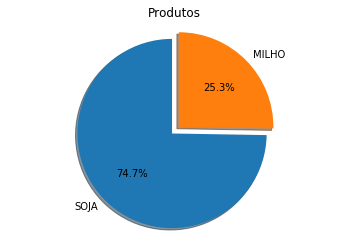

In [16]:
#Grafico de pizza do produto
soja, milho = __filter(produto)

labels = 'SOJA', 'MILHO'
sizes = [len(soja), len(milho)]
explode = (0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title('Produtos')
plt.show()


# Gráfico de barras de produtos por mês

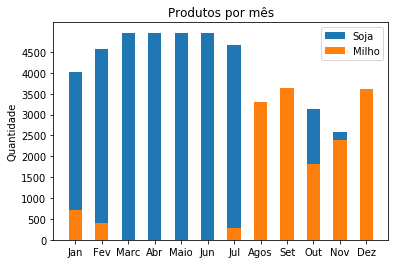

In [17]:
#Grafico de barras
df = product_per_month(agendamento,produto)
N = 12
soja_01, milho_01 = __filter(df[1])
soja_02, milho_02 = __filter(df[2])
soja_03, milho_03 = __filter(df[3])
soja_04, milho_04 = __filter(df[4])
soja_05, milho_05 = __filter(df[5])
soja_06, milho_06 = __filter(df[6])
soja_07, milho_07 = __filter(df[7])
soja_08, milho_08 = __filter(df[8])
soja_09, milho_09 = __filter(df[9])
soja_10, milho_10 = __filter(df[10])
soja_11, milho_11 = __filter(df[11])
soja_12, milho_12 = __filter(df[12])

soja_means = (len(soja_01),len(soja_02), len(soja_03), len(soja_04), len(soja_05), len(soja_06),
             len(soja_07), len(soja_08), len(soja_09), len(soja_10), len(soja_11), len(soja_12))

milho_means = (len(milho_01),len(milho_02), len(milho_03), len(milho_04), len(milho_05), len(milho_06),
             len(milho_07), len(milho_08), len(milho_09), len(milho_10), len(milho_11), len(milho_12))

ind = np.arange(N) # x 
width = 0.50

soja = plt.bar(ind, soja_means, width)
milho = plt.bar(ind,milho_means, width)

plt.ylabel('Quantidade')
plt.title('Produtos por mês')
plt.xticks(ind, ('Jan', 'Fev', 'Marc', 'Abr', 'Maio', 'Jun', 'Jul',
                 'Agos', 'Set', 'Out', 'Nov', 'Dez'))
plt.yticks(np.arange(0,5000,500))
plt.legend((soja[0],milho[0]), ('Soja','Milho'))

plt.show()





# Gráfico de barras da situação dos caminhoneiros por mês